               0                  1              2             3   \
0  word_freq_make  word_freq_address  word_freq_all  word_freq_3d   
1             0.0               0.64           0.64           0.0   
2            0.21               0.28            0.5           0.0   
3            0.06                0.0           0.71           0.0   
4             0.0                0.0            0.0           0.0   

              4               5                 6                   7   \
0  word_freq_our  word_freq_over  word_freq_remove  word_freq_internet   
1           0.32             0.0               0.0                 0.0   
2           0.14            0.28              0.21                0.07   
3           1.23            0.19              0.19                0.12   
4           0.63             0.0              0.31                0.63   

                8               9   ...           48                   49  \
0  word_freq_order  word_freq_mail  ...  char_freq_;          c

C:\Users\patre\AppData\Local\Temp\ipykernel_12652\3067469429.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[57], palette='viridis')  # Assuming column 57 is the label


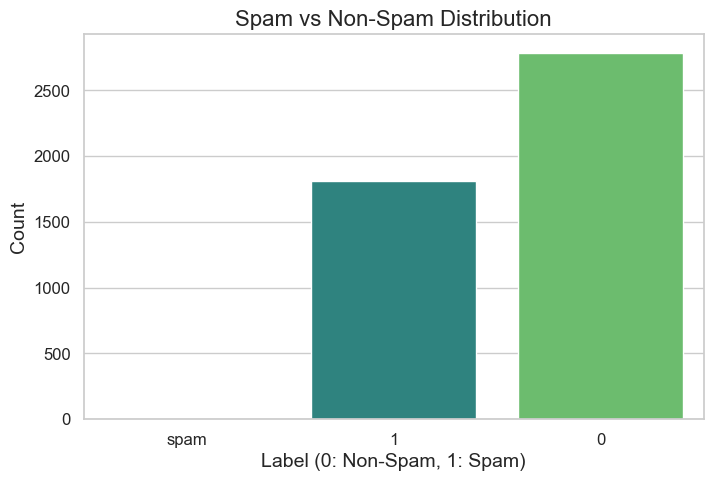

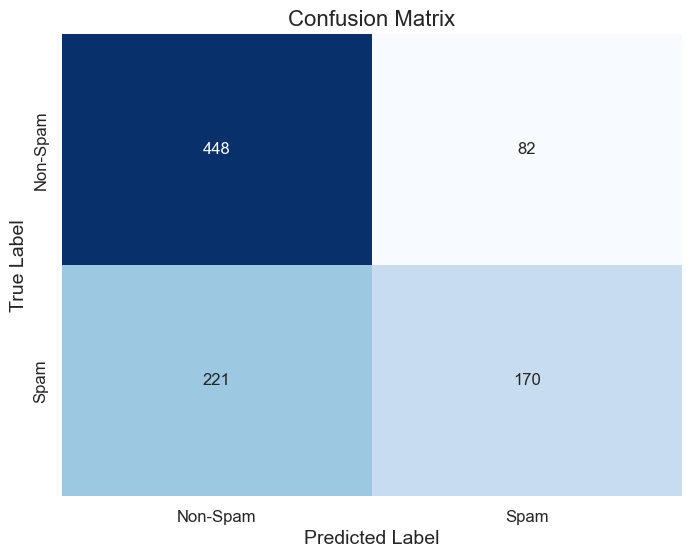

Classification Report:

              precision    recall  f1-score   support

    Non-Spam       0.67      0.85      0.75       530
        Spam       0.67      0.43      0.53       391

    accuracy                           0.67       921
   macro avg       0.67      0.64      0.64       921
weighted avg       0.67      0.67      0.65       921



In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

sns.set(style="whitegrid")

data = pd.read_csv('spambase.csv', header=None)

print(data.head())

# Class distribution
plt.figure(figsize=(8, 5))
sns.countplot(x=data[57], palette='viridis')  # Assuming column 57 is the label
plt.title('Spam vs Non-Spam Distribution', fontsize=16)
plt.xlabel('Label (0: Non-Spam, 1: Spam)', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

X = data.iloc[:, :-1]  # All columns except the last one
y = data[57]  # Last column is the label

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Extraction
vectorizer = TfidfVectorizer()
X_train_tfidf = vectorizer.fit_transform(X_train.astype(str).agg(' '.join, axis=1))
X_test_tfidf = vectorizer.transform(X_test.astype(str).agg(' '.join, axis=1))

# Train a Logistic Regression model
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Make predictions
y_pred = model.predict(X_test_tfidf)

# Evaluation
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["Non-Spam", "Spam"])

# Plot Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=["Non-Spam", "Spam"], yticklabels=["Non-Spam", "Spam"])
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

# Print Classification Report
print("Classification Report:\n")
print(report)
